In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/clicks.csv', 
                 engine='c', 
                 usecols=['advertiser_id', 'source_id', 'created',
                          'latitude', 'longitude', 'carrier_id', 
                          'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
                          'timeToClick', 'touchX', 'touchY', 'ref_type', 'ref_hash','trans_id'], 
                 dtype={'advertiser_id':np.int8, 'source_id':np.int8, 
                        'carrier_id':'category', 
                        'os_minor':'category', 'os_major':'category', 'specs_brand':np.int8, 'brand':'category',
                        'timeToClick':np.float16, 'touchX':np.float16, 'touchY':np.float16, 'ref_type':np.int8, 'ref_hash':np.int8})

# Posicion clicks en la pantalla 

In [3]:
df_touch = df[['touchX','touchY']].copy()

In [4]:
df_touch['touchY'].isnull().count()

26351

In [5]:
df_touch['touchX'].isnull().count()

26351

In [6]:
df_touch['touchY'] = df_touch['touchY'].fillna(0)
df_touch['touchX'] = df_touch['touchX'].fillna(0)

In [7]:
df_touch['touchX'] = df_touch['touchX'].loc[df_touch['touchX'] > 0]
df_touch['touchY'] = df_touch['touchY'].loc[df_touch['touchY'] > 0]

In [8]:
df_touch['touchY'] /= df_touch['touchY'].max()

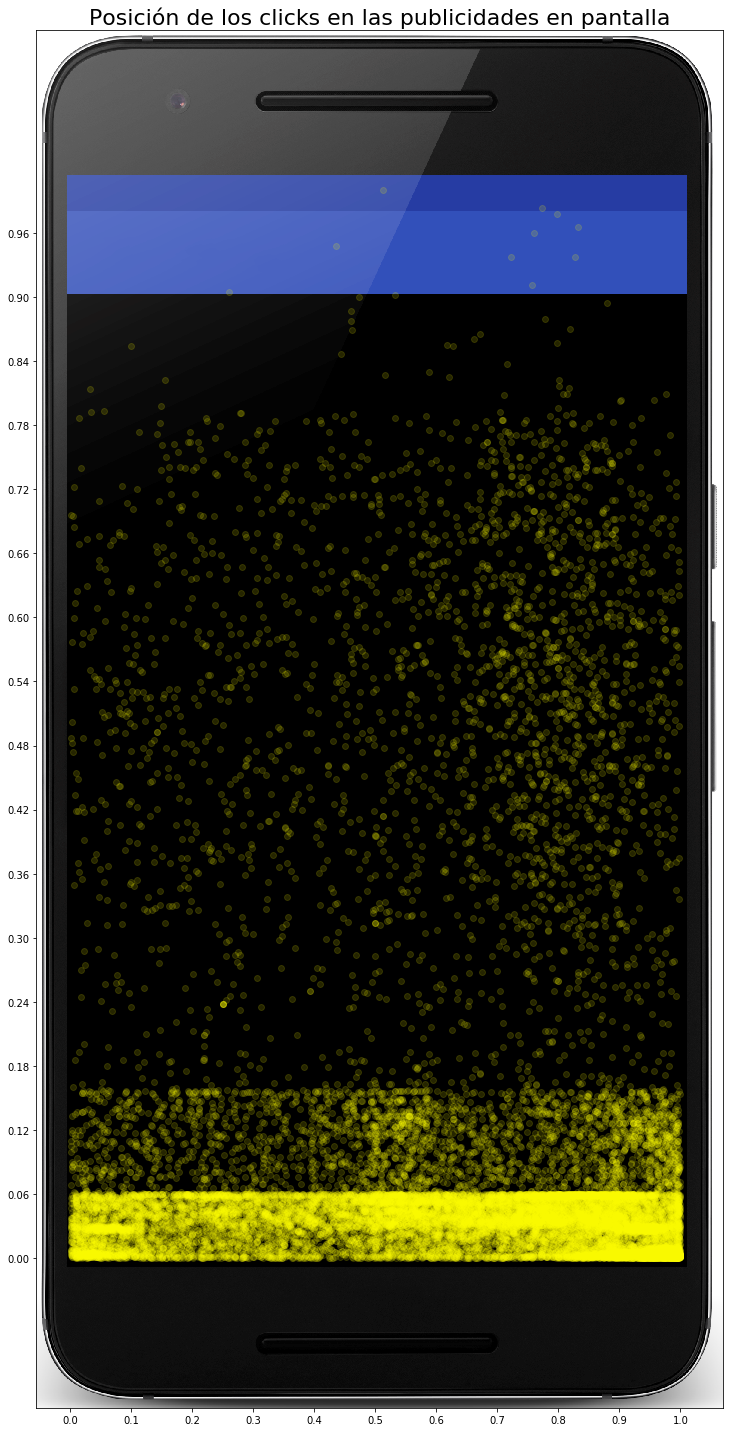

In [12]:
img = plt.imread("img/phone.png")
fig, ax = plt.subplots(figsize=(12,20))
ax.imshow(img, extent=[-0.055, 1.07, -0.14, 1.15])
plt.title('Posición de los clicks en las publicidades en pantalla',fontsize=22)
plt.xticks(np.arange(0, 1.02, 0.1))
plt.yticks(np.arange(0, 1.02, 0.06))
ax.set_aspect(1.75)
plt.tight_layout()
plt.scatter(df_touch.touchX, df_touch.touchY,alpha='.15',color='yellow')
plt.savefig('res/clicks_position_X_and_Y.png',dpi=100)
plt.show()